In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading only images and not their labels
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.6, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 784)
(10000, 784)


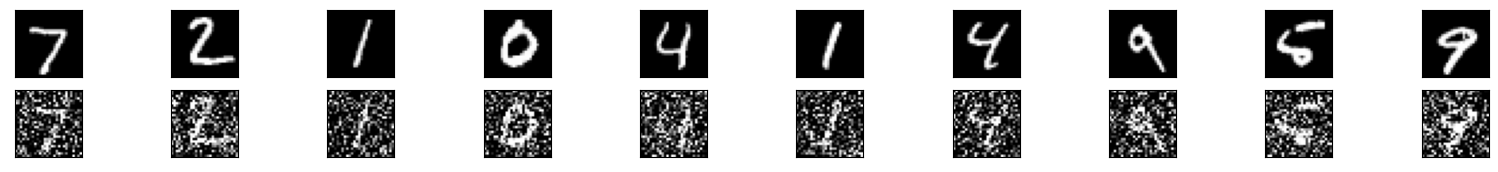

In [3]:
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

In [4]:
input_img=Input(shape=(X_train_noisy.shape[1]))

encoded=Dense(128, activation='relu')(input_img)
encoded=Dense(64, activation='relu')(encoded)
encoded=Dense(32, activation='relu')(encoded)


decoded=Dense(64, activation='relu')(encoded)
decoded=Dense(128, activation='relu')(decoded)
decoded=Dense(784, activation='sigmoid')(decoded)


In [5]:
autoencoder=Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [6]:
encoder=Model(input_img, encoded)

encoder.summary()

autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.fit(X_train_noisy,X_train_noisy,
               epochs=50,
               batch_size=256, validation_data=(X_test_noisy,X_test_noisy) )

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.5618 - val_loss: 0.5806
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5383 - val_loss: 0.5738
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5311 - val_loss: 0.5674
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5277 - val_loss: 0.5646
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5256 - val_loss: 0.5612
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5240 - val_loss: 0.5607
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5228 - val_loss: 0.5580
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.5220 - val_loss: 0.5572
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.5215 - val_loss: 0.5563
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.5212 - val_loss

In [8]:
encoded_images=encoder.predict(X_test_noisy)
encoded_images
encoded_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 32)

In [9]:
predicted=autoencoder.predict(X_test_noisy)

predicted

313/313 [==============================] - 1s 3ms/step


array([[0.16890752, 0.19709766, 0.20266885, ..., 0.18907617, 0.1871966 ,
        0.18698299],
       [0.18511468, 0.20015462, 0.19371173, ..., 0.17788878, 0.18784757,
        0.19010687],
       [0.20078607, 0.20370105, 0.20310009, ..., 0.19286963, 0.19535647,
        0.18499556],
       ...,
       [0.2020072 , 0.19091088, 0.19296949, ..., 0.18516444, 0.19512405,
        0.19887024],
       [0.2129189 , 0.20684256, 0.19196309, ..., 0.18685926, 0.1977668 ,
        0.18134438],
       [0.20354642, 0.20387198, 0.1984457 , ..., 0.19935492, 0.194335  ,
        0.19793227]], dtype=float32)

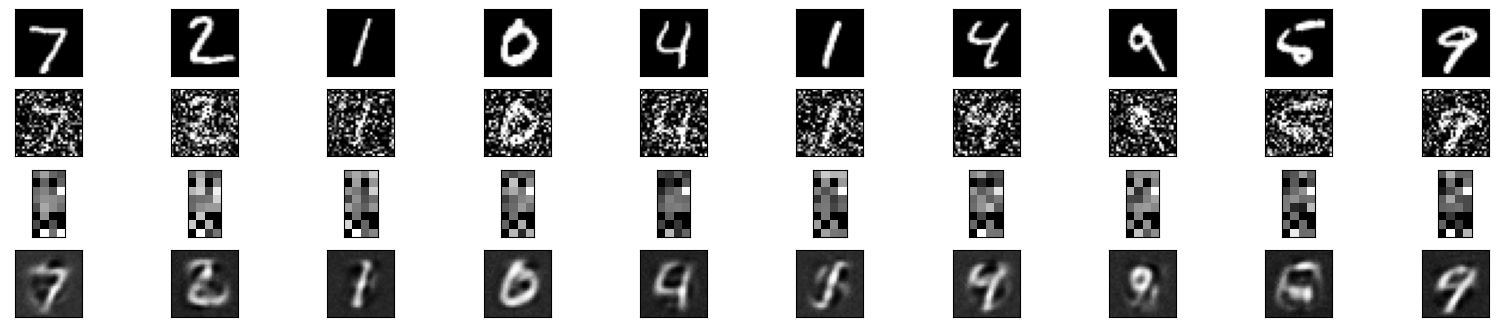

In [27]:
# %load "g:/My Drive/mnist2.py"
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  # display encoded images
    ax = plt.subplot(4, 20, i + 1+20*2)
    plt.imshow(encoded_images[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display reconstruction images
    ax = plt.subplot(4, 20, i + 1+20*3)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
